In [2]:
from dask.distributed import Client, LocalCluster
import tpot
import sklearn
import sklearn.datasets
import numpy as np

import tpot.objectives


scorer = sklearn.metrics.get_scorer('roc_auc_ovr')

X, y = sklearn.datasets.load_breast_cancer(return_X_y=True)
X_train, X_test, y_train, y_test = sklearn.model_selection.train_test_split(X, y, train_size=0.75, test_size=0.25)


est = tpot.TPOTClassifier(
    scorers=[scorer, tpot.objectives.complexity_scorer],
    scorers_weights=[1.0, -1.0],

    search_space="linear",
    n_jobs=4, 
    max_time_mins=60, 
    max_eval_time_mins=10,
    early_stop=2,
    verbose=2,)
est.fit(X_train, y_train)

print(scorer(est, X_test, y_test))

c:\Users\joaol\miniconda3\envs\tpotenv\lib\site-packages\distributed\node.py:187: UserWarning: Port 8787 is already in use.
Perhaps you already have a cluster running?
Hosting the HTTP server on port 53884 instead
  warnings.warn(
Generation: : 7it [11:36, 99.44s/it] 


0.9979716024340771


In [3]:
best_pipeline = est.fitted_pipeline_
best_pipeline

,steps,"[('standardscaler', ...), ('passthrough', ...), ...]"
,transform_input,None
,memory,None
,verbose,False
,copy,True
,with_mean,True
,with_std,True
,transformer_list,"[('featureunion', ...), ('passthrough', ...)]"
,n_jobs,None
,transformer_weights,None
,verbose,False


In [4]:
best_pipeline.predict(X_test)

array([0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1,
       0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0,
       1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1,
       0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1])

In [5]:
#get the score/objective column names generated by TPOT
est.objective_names

['roc_auc_score', 'complexity_scorer']

In [24]:
df = est.evaluated_individuals
print(df.head())

   roc_auc_score  complexity_scorer Parents Variation_Function  \
0            NaN                NaN     NaN                NaN   
1       0.988203            11263.0     NaN                NaN   
2            NaN                NaN     NaN                NaN   
3            NaN                NaN     NaN                NaN   
4            NaN                NaN     NaN                NaN   

                                          Individual  Generation  \
0  <tpot.search_spaces.pipelines.sequential.Seque...         0.0   
1  <tpot.search_spaces.pipelines.sequential.Seque...         0.0   
2  <tpot.search_spaces.pipelines.sequential.Seque...         0.0   
3  <tpot.search_spaces.pipelines.sequential.Seque...         0.0   
4  <tpot.search_spaces.pipelines.sequential.Seque...         0.0   

   Submitted Timestamp  Completed Timestamp Eval Error  Pareto_Front  \
0         1.754442e+09         1.754442e+09    INVALID           NaN   
1         1.754442e+09         1.754442e+09       

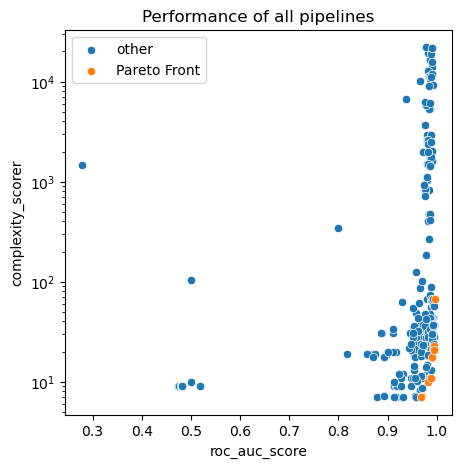

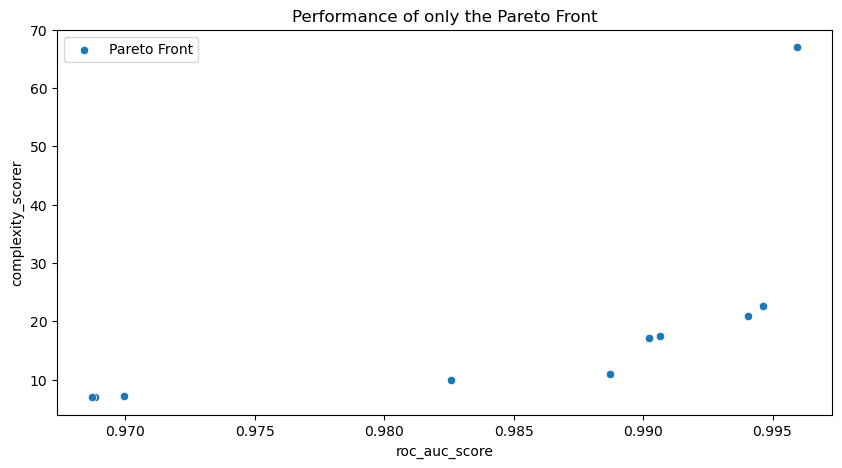

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt
#replace nans in pareto front with 0
fig, ax = plt.subplots(figsize=(5,5))
sns.scatterplot(df[df['Pareto_Front']!=1], x='roc_auc_score', y='complexity_scorer', label='other', ax=ax)
sns.scatterplot(df[df['Pareto_Front']==1], x='roc_auc_score', y='complexity_scorer', label='Pareto Front', ax=ax)
ax.title.set_text('Performance of all pipelines')
#log scale y
ax.set_yscale('log')
plt.show()

#replace nans in pareto front with 0
fig, ax = plt.subplots(figsize=(10,5))
sns.scatterplot(df[df['Pareto_Front']==1], x='roc_auc_score', y='complexity_scorer', label='Pareto Front', ax=ax)
ax.title.set_text('Performance of only the Pareto Front')
#log scale y
# ax.set_yscale('log')
plt.show()

In [8]:
#plot only the pareto front pipelines
sorted_pareto_front = df[df['Pareto_Front']==1].sort_values('roc_auc_score', ascending=False)
sorted_pareto_front

,roc_auc_score,complexity_scorer,Parents,Variation_Function,Individual,Generation,Submitted Timestamp,Completed Timestamp,Eval Error,Pareto_Front,Instance
320,0.995944,67.0,"(200, 200)",ind_mutate,<tpot.search_spaces.pipelines.sequential.Seque...,6.0,1.754442e+09,1.754442e+09,None,1.0,"(StandardScaler(), Passthrough(), FeatureUnion..."
287,0.994647,22.7,"(233, 233)",ind_mutate,<tpot.search_spaces.pipelines.sequential.Seque...,5.0,1.754442e+09,1.754442e+09,None,1.0,"(StandardScaler(), SelectFromModel(estimator=E..."
388,0.994037,20.9,"(309, 292)",ind_crossover,<tpot.search_spaces.pipelines.sequential.Seque...,7.0,1.754442e+09,1.754442e+09,None,1.0,"(MinMaxScaler(), RFE(estimator=ExtraTreesClass..."
382,0.990635,17.5,"(326, 283)","ind_crossover , ind_mutate",<tpot.search_spaces.pipelines.sequential.Seque...,7.0,1.754442e+09,1.754442e+09,None,1.0,"(MaxAbsScaler(), SelectFromModel(estimator=Ext..."
378,0.990240,17.2,"(233, 233)",ind_mutate,<tpot.search_spaces.pipelines.sequential.Seque...,7.0,1.754442e+09,1.754442e+09,None,1.0,"(MaxAbsScaler(), SelectFromModel(estimator=Ext..."
357,0.988739,11.0,"(337, 337)",ind_mutate,<tpot.search_spaces.pipelines.sequential.Seque...,7.0,1.754443e+09,1.754443e+09,None,1.0,"(MaxAbsScaler(), RFE(estimator=ExtraTreesClass..."
208,0.982568,10.0,"(185, 120)",ind_crossover,<tpot.search_spaces.pipelines.sequential.Seque...,4.0,1.754442e+09,1.754442e+09,None,1.0,"(Normalizer(norm=np.str_('l1')), VarianceThres..."
237,0.969940,7.2,"(134, 134)",ind_mutate,<tpot.search_spaces.pipelines.sequential.Seque...,4.0,1.754442e+09,1.754442e+09,None,1.0,"(MaxAbsScaler(), VarianceThreshold(threshold=0..."
283,0.968834,7.1,"(228, 111)",ind_crossover,<tpot.search_spaces.pipelines.sequential.Seque...,5.0,1.754442e+09,1.754442e+09,None,1.0,"(MaxAbsScaler(), VarianceThreshold(threshold=0..."
391,0.968725,7.0,"(184, 184)",ind_mutate,<tpot.search_spaces.pipelines.sequential.Seque...,7.0,1.754442e+09,1.754442e+09,None,1.0,"(MaxAbsScaler(), VarianceThreshold(threshold=0..."


In [9]:
#access the best performing pipeline with the lowest complexity

best_pipeline_lowest_complexity = sorted_pareto_front.iloc[-1]['Instance']
best_pipeline_lowest_complexity

,steps,"[('maxabsscaler', ...), ('variancethreshold', ...), ...]"
,transform_input,None
,memory,None
,verbose,False
,copy,True
,threshold,0.0487418416046
,transformer_list,"[('skiptransformer', ...), ('passthrough', ...)]"
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True


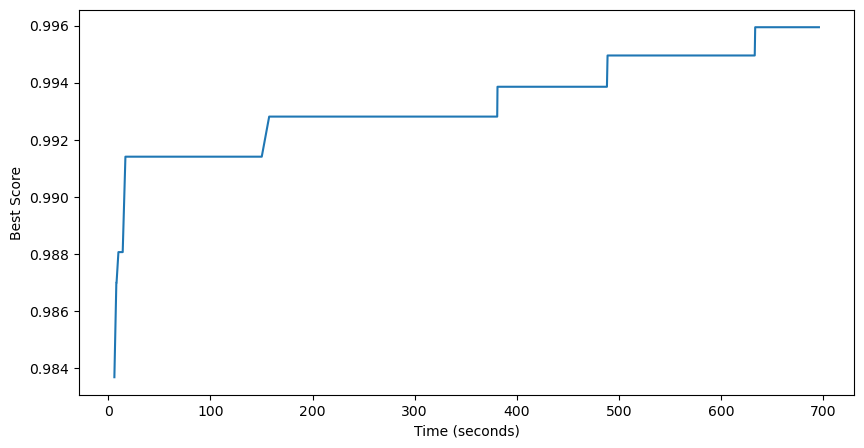

In [10]:
#get columns where roc_auc_score is not NaN
scores_and_times = df[df['roc_auc_score'].notna()][['roc_auc_score', 'Completed Timestamp']].sort_values('Completed Timestamp', ascending=True).to_numpy()

#get best score at a given time
best_scores = np.maximum.accumulate(scores_and_times[:,0])
times = scores_and_times[:,1]
times = times - df['Submitted Timestamp'].min()

fig, ax = plt.subplots(figsize=(10,5))
ax.plot(times, best_scores)
ax.set_xlabel('Time (seconds)')
ax.set_ylabel('Best Score')
plt.show()


In [11]:
import dill as pickle
with open("best_pipeline.pkl", "wb") as f:
    pickle.dump(best_pipeline, f)

#load the pipeline
import dill as pickle
with open("best_pipeline.pkl", "rb") as f:
    my_loaded_best_pipeline = pickle.load(f)

In [23]:
my_loaded_best_pipeline
my_loaded_best_pipeline.predict(X_test)

array([0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1,
       0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0,
       1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1,
       0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1])

In [29]:
tpot = est

In [1]:
from tpot.objectives import complexity_scorer
from sklearn.metrics import get_scorer
scorer = get_scorer('f1_weighted')

# supondo que 'scorer' é seu scorer de F1 original:
f1_scorer = scorer  
pipeline = tpot.fitted_pipeline_

f1_value   = f1_scorer(pipeline, X_test, y_test)       # milissegundos
complexity = complexity_scorer(pipeline)             # igualmente rápido

print(f"F1 = {f1_value:.4f}, Complexity = {complexity}")


NameError: name 'tpot' is not defined

In [37]:
df = tpot.pareto_front
df = df[['roc_auc_score', 'complexity_scorer', 'Generation', 'Pareto_Front']]
df


,roc_auc_score,complexity_scorer,Generation,Pareto_Front
208,0.982568,10.0,4.0,1.0
237,0.969940,7.2,4.0,1.0
283,0.968834,7.1,5.0,1.0
287,0.994647,22.7,5.0,1.0
320,0.995944,67.0,6.0,1.0
357,0.988739,11.0,7.0,1.0
378,0.990240,17.2,7.0,1.0
382,0.990635,17.5,7.0,1.0
388,0.994037,20.9,7.0,1.0
391,0.968725,7.0,7.0,1.0
